In [7]:
import pandas as pd
import datetime
import re
import requests
import bs4
import matplotlib.pyplot as plt
#import matplotlib

In [8]:
df_who = pd.read_json (r'data-who/covidwho.json')

In [9]:
df_who.head()

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
0,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-22 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
1,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-23 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
2,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-24 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
3,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-25 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
4,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-26 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN


In [10]:
df_who_Germany = df_who[df_who['Country'] =="Germany"]
#NewYork = covdat["Indexes"]= covdat["Province/State"].str.find('newyork') 

In [11]:
df_who_Germany

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
9629,Germany,DE,51.17,10.45,0,0,0,0,2020-01-22 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9630,Germany,DE,51.17,10.45,0,0,0,0,2020-01-23 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9631,Germany,DE,51.17,10.45,0,0,0,0,2020-01-24 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9632,Germany,DE,51.17,10.45,0,0,0,0,2020-01-25 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9633,Germany,DE,51.17,10.45,0,0,0,0,2020-01-26 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,Germany,DE,51.17,10.45,91159,1275,24575,0,2020-04-03 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9702,Germany,DE,51.17,10.45,96092,1444,26400,0,2020-04-04 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9703,Germany,DE,51.17,10.45,100123,1584,28700,0,2020-04-05 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9704,Germany,DE,51.17,10.45,103374,1810,28700,0,2020-04-06 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN


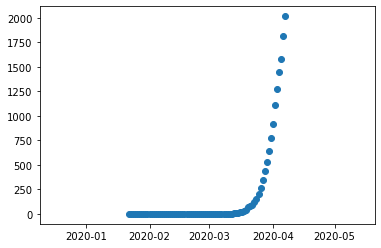

In [12]:
plt.scatter(df_who_Germany['Date'], df_who_Germany['Deaths'])

In [21]:
df3 = df_who.groupby('Date')

In [22]:
df3.head()

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
0,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-22 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
1,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-23 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
2,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-24 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
3,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-25 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
4,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-26 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,Angola,AO,-11.20,17.87,8,2,1,0,2020-04-03 00:00:00+00:00,8bba7786-aabb-423a-97a1-7140fa6dfe19,NaN,NaN,NaN
381,Angola,AO,-11.20,17.87,10,2,2,0,2020-04-04 00:00:00+00:00,8bba7786-aabb-423a-97a1-7140fa6dfe19,NaN,NaN,NaN
382,Angola,AO,-11.20,17.87,14,2,2,0,2020-04-05 00:00:00+00:00,8bba7786-aabb-423a-97a1-7140fa6dfe19,NaN,NaN,NaN
383,Angola,AO,-11.20,17.87,16,2,2,0,2020-04-06 00:00:00+00:00,8bba7786-aabb-423a-97a1-7140fa6dfe19,NaN,NaN,NaN


In [33]:
#df_who.loc["Germany"]
#rowData = df_who.Country.loc[ ['Germany' , 'Italy'] , : ]
#df_who.Country.head()
#rowData = df_who.Country.loc[ 'Germany' ,]
df_who[df_who['Country'].str.contains('Germany')]

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
9629,Germany,DE,51.17,10.45,0,0,0,0,2020-01-22 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9630,Germany,DE,51.17,10.45,0,0,0,0,2020-01-23 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9631,Germany,DE,51.17,10.45,0,0,0,0,2020-01-24 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9632,Germany,DE,51.17,10.45,0,0,0,0,2020-01-25 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9633,Germany,DE,51.17,10.45,0,0,0,0,2020-01-26 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,Germany,DE,51.17,10.45,91159,1275,24575,0,2020-04-03 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9702,Germany,DE,51.17,10.45,96092,1444,26400,0,2020-04-04 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9703,Germany,DE,51.17,10.45,100123,1584,28700,0,2020-04-05 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9704,Germany,DE,51.17,10.45,103374,1810,28700,0,2020-04-06 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN


In [35]:
#df_who[df_who['Country'].str.contains('Germany')]
df_who_Germany.loc[df_who_Germany['Date'].idxmax()]

Country        Germany
CountryCode         DE
Lat              51.17
Lon              10.45
Confirmed       107663
Name: 9705, dtype: object

In [36]:
df_who.sort_values('Date', ascending=False).drop_duplicates(['Country'])

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
263476,Zimbabwe,ZW,-19.02,29.15,11,2,0,0,2020-04-07 00:00:00+00:00,ea6b4f98-988c-4ff1-b6e9-3d75c654ea0f,NaN,NaN,NaN
261330,United States of America,US,32.59,-82.30,3,0,0,0,2020-04-07 00:00:00+00:00,9e1f7f10-6c58-4f02-b9ed-f3003e5f60bb,Georgia,Emanuel,13107.0
9859,Greece,GR,39.07,21.82,1832,81,269,0,2020-04-07 00:00:00+00:00,70392d48-d54a-4f21-9336-1653fcca137e,NaN,NaN,NaN
4157,Chad,TD,15.45,18.73,10,0,2,0,2020-04-07 00:00:00+00:00,59a6d202-1449-4fe3-9973-4aed907b9f76,NaN,NaN,NaN
9936,Grenada,GD,12.26,-61.60,12,0,0,0,2020-04-07 00:00:00+00:00,a5baa0a9-7ee4-4613-83b2-3438b67e9b78,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15172,Peru,PE,-9.19,-75.02,2954,107,1301,0,2020-04-07 00:00:00+00:00,73f5465a-6eb6-49a6-8c81-621d10d9d5ed,NaN,NaN,NaN
18178,Uganda,UG,1.37,32.29,52,0,0,0,2020-04-07 00:00:00+00:00,d6a0dedd-6501-4a43-b5e4-5c8c35973324,NaN,NaN,NaN
11630,Korea (South),KR,35.91,127.77,10331,192,6694,0,2020-04-07 00:00:00+00:00,ccc408ea-10bf-44ea-9dd3-41e8d1eaf541,NaN,NaN,NaN
12169,Libya,LY,26.34,17.23,20,1,1,0,2020-04-07 00:00:00+00:00,53dc0e4c-6f22-408e-ad77-7b7cee8c7f08,NaN,NaN,NaN


In [63]:
#df2 = df_who.loc[df_who["Country"] == "Germany"].groupby("Date").agg({"Confirmed": "max"}).rename(columns={"Confirmed": "max"});
df2 = df_who.loc[df_who["Country"] == "Germany"].groupby("Date")


df2.head()


#(df_who
# .loc[df_who["Country"] == "Germany"]
# .groupby("Date")
# .agg({"Confirmed": "max"})
# .rename(columns={"Confirmed": "max"})).plot();

#(df
# .loc[df["order_status"] == "delivered"]
# .groupby("month_id")
# .agg({"price": "sum"})
# .rename(columns={"price": "revenue"})).plot();

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
9629,Germany,DE,51.17,10.45,0,0,0,0,2020-01-22 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9630,Germany,DE,51.17,10.45,0,0,0,0,2020-01-23 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9631,Germany,DE,51.17,10.45,0,0,0,0,2020-01-24 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9632,Germany,DE,51.17,10.45,0,0,0,0,2020-01-25 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9633,Germany,DE,51.17,10.45,0,0,0,0,2020-01-26 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,Germany,DE,51.17,10.45,91159,1275,24575,0,2020-04-03 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9702,Germany,DE,51.17,10.45,96092,1444,26400,0,2020-04-04 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9703,Germany,DE,51.17,10.45,100123,1584,28700,0,2020-04-05 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9704,Germany,DE,51.17,10.45,103374,1810,28700,0,2020-04-06 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN


In [30]:
df_countries= df_who.groupby('Country')

In [31]:
df_countries

In [48]:
df_countries.head()

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
0,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-22 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
1,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-23 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
2,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-24 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
3,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-25 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
4,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-26 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263400,Zimbabwe,ZW,-19.02,29.15,0,0,0,0,2020-01-22 00:00:00+00:00,ea6b4f98-988c-4ff1-b6e9-3d75c654ea0f,NaN,NaN,NaN
263401,Zimbabwe,ZW,-19.02,29.15,0,0,0,0,2020-01-23 00:00:00+00:00,ea6b4f98-988c-4ff1-b6e9-3d75c654ea0f,NaN,NaN,NaN
263402,Zimbabwe,ZW,-19.02,29.15,0,0,0,0,2020-01-24 00:00:00+00:00,ea6b4f98-988c-4ff1-b6e9-3d75c654ea0f,NaN,NaN,NaN
263403,Zimbabwe,ZW,-19.02,29.15,0,0,0,0,2020-01-25 00:00:00+00:00,ea6b4f98-988c-4ff1-b6e9-3d75c654ea0f,NaN,NaN,NaN


In [34]:
df_countries.agg({'Confirmed':'max'})

,Confirmed
Country,
Afghanistan,423
Albania,383
Algeria,1468
Andorra,545
Angola,17
...,...
Venezuela (Bolivarian Republic),165
Viet Nam,249
Western Sahara,4


In [44]:
df2=df_countries.agg({'Confirmed':'max'})

In [45]:
df2

,Confirmed
Country,
Afghanistan,423
Albania,383
Algeria,1468
Andorra,545
Angola,17
...,...
Venezuela (Bolivarian Republic),165
Viet Nam,249
Western Sahara,4


In [47]:
df2

pandas.core.frame.DataFrame

In [ ]:

data.groupby('prime_genre', as_index=False).agg({'price': 'mean'}).sort_values('price', ascending=False)

In [38]:
def eurostat(url):
    from pyjstat import pyjstat
    from collections import OrderedDict
    
    # read from json-stat
    dataset = pyjstat.Dataset.read(url)
    
    # write to dataframe
    df = dataset.write('dataframe')
    
    return df

#example from query builder
url = 'http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/tgs00045?precision=1&unit=THS_HD&animals=A2300F'

In [39]:
url = 'http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/tin00173?precision=1&unit=PC&accommod=BEDPL&shortLabel=1'

In [40]:
eurostat(url)

,accommod,unit,geo,time,value
0,Bedplaces,Percentage,Austria,2019M03,53.4
1,Bedplaces,Percentage,Austria,2019M04,34.8
2,Bedplaces,Percentage,Austria,2019M05,33.5
3,Bedplaces,Percentage,Austria,2019M06,48.3
4,Bedplaces,Percentage,Austria,2019M07,59.3
...,...,...,...,...,...
475,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2019M10,15.8
476,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2019M11,15.7
477,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2019M12,15.5
478,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2020M01,NaN


In [41]:
tourism = eurostat(url)

In [42]:
type(tourism)

pandas.core.frame.DataFrame

In [43]:
tourism.groupby("value").agg({"value":"sum"})

,value
value,
11.1,11.1
12.7,12.7
14.0,14.0
14.3,14.3
15.5,15.5
...,...
87.0,87.0
87.7,87.7
88.4,88.4
